In [ ]:
pip install git+https://github.com/huggingface/transformers.git


  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-sfgbhwi5
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-sfgbhwi5
  Resolved https://github.com/huggingface/transformers.git to commit d71f5b3ea8b4a3a530d0c868e87d57311b177c1c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.40.0.dev0-py3-none-any.whl size=8829432 sha256=c228f6dcb724b3d46f70c7f668d8ab117405a3a020e4140b34c2f81a3ed1ea84
  Stored in directory: /tmp/pip-ephem-wheel-cache-och2wxt5/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


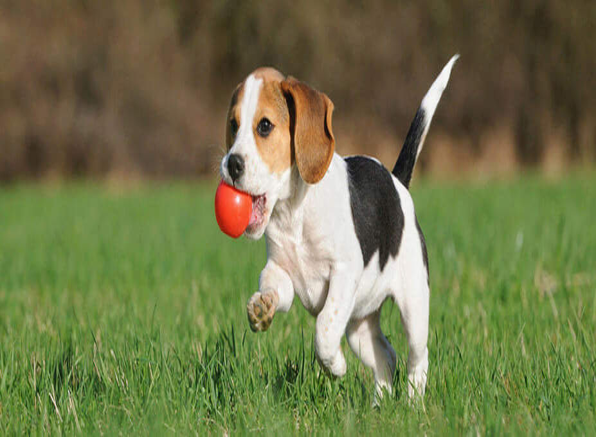

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


a beagle dog running with a red ball in its mouth


Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


a beagle dog running with a red ball in its mouth
a beagle dog running with a red ball in its mouth


In [ ]:
import requests
from PIL import Image
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

image_path = "/content/dog-playtime-927x388.jpg"
image = Image.open(image_path).convert('RGB')
display(image.resize((596, 437)))

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)


device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

inputs = processor(image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)